## Adjusting Color Settings


#### Purpose
This notebook demonstrates alternative color settings to adjust the brightness of vitual H&E images. Additionally it shows users how to to render virtual IHC images usign alternative color parameters. 


#### ----- Color Saturation ------
1. Data is loaded into memory from the prostate folder locaded in examples/h5_sample_data
2. Raw data is displayed
3. Virtual H&E color settings are loaded
4. The data is processed with differing parameters to demonstrate how users can change thecolor settings to suit their preferance.

#### ------ Virtual IHC ------
1. Data is loaded into memory from the IHC_data folder located in examples/h5_sample_data
2. The raw data is displayed
3. Color settings for virtual chromogenic IHC are loaded
4. The raw data is translated to virtual IHC color space using fc.rapidFalsecolor
5. The result is displayed





In [1]:
import falsecolor.coloring as fc
from falsecolor.process import ViewImage
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py as h5

## ----- Color Saturation -----

In [2]:
#load data in ./h5_sample_data/example_data.h5
file_path = os.path.join(os.getcwd(),'h5_sample_data/prostate/data.h5')

with h5.File(file_path,'r') as f:
    
    #read nuclear channel into memory
    nuclei_HE = f['t00000/s00/0/cells'][:]
    
    #read cytoplasmic channel into memory
    cyto_HE = f['t00000/s01/0/cells'][:]
f.close()

print(nuclei_HE.shape, cyto_HE.shape)

(16, 1024, 1024) (16, 1024, 1024)


<IPython.core.display.Javascript object>


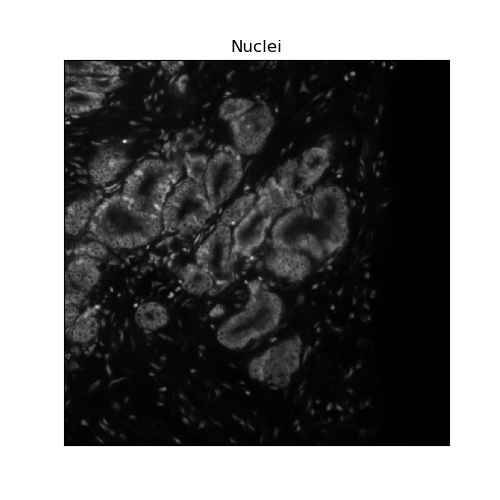

<IPython.core.display.Javascript object>


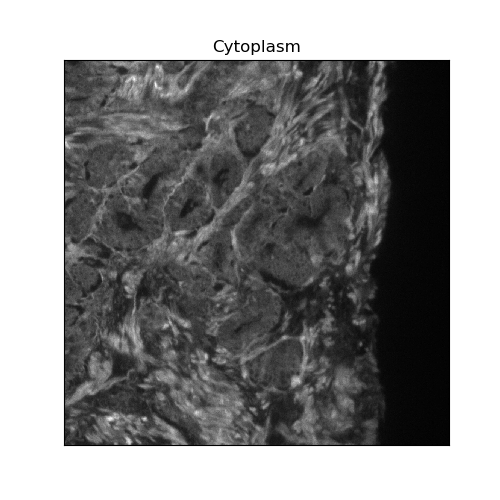

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b207330760>)

In [3]:
#View raw data

ViewImage(nuclei_HE[0], figsize = (5,5), title = 'Nuclei', cmap = 'gray')
ViewImage(cyto_HE[0], figsize = (5,5), title = 'Cytoplasm', cmap = 'gray')

In [4]:
#grab color settings for virtual H&E
HE_settings = fc.getColorSettings(key = 'HE')

#Color settings for each image are in RGB order
print(HE_settings)

{'nuclei': [0.17, 0.27, 0.105], 'cyto': [0.05, 1.0, 0.54]}


In [5]:
#Color saturation can be adjusted by raising or lowering the normalization factor parameters in rapidFalseColor

#default normalization levels for non-flatfielded data are set as follows
DefaultHE = fc.rapidFalseColor(nuclei_HE[0], cyto_HE[0], HE_settings['nuclei'], HE_settings['cyto'],
                              nuc_normfactor = 8000, cyto_normfactor = 3000)


#lowering the value of the normalization parameters makes the coloration darker
DarkHE = fc.rapidFalseColor(nuclei_HE[0], cyto_HE[0], HE_settings['nuclei'], HE_settings['cyto'],
                            nuc_normfactor = 6000, cyto_normfactor = 1500)

#raising the value of the normalization parameters makes the coloration lighter
LightHE = fc.rapidFalseColor(nuclei_HE[1], cyto_HE[1], HE_settings['nuclei'], HE_settings['cyto'],
                            nuc_normfactor = 10000, cyto_normfactor = 4500)

<IPython.core.display.Javascript object>


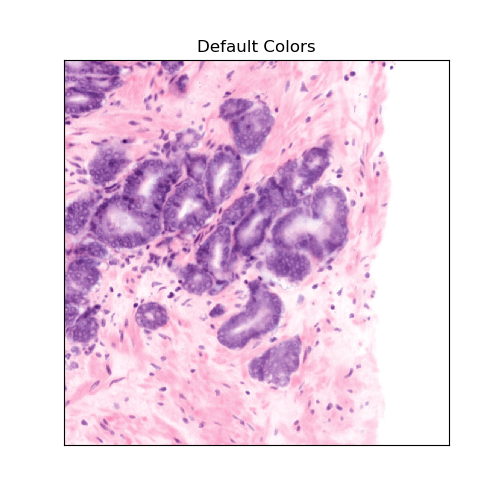

<IPython.core.display.Javascript object>


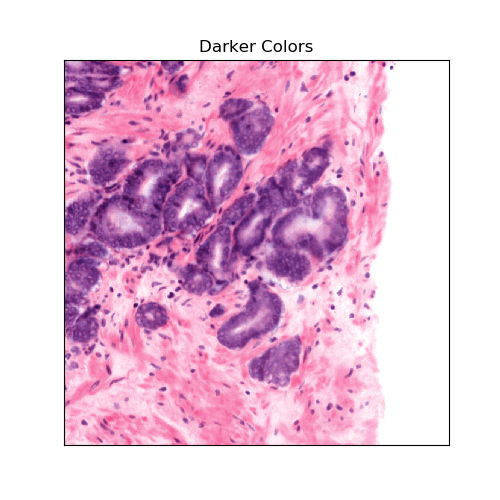

<IPython.core.display.Javascript object>


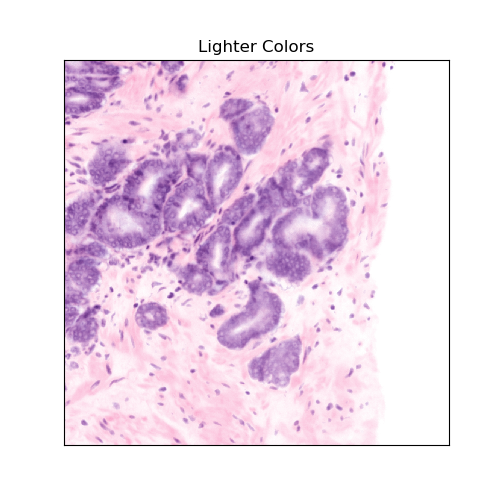

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b207ba61f0>)

In [6]:
ViewImage(DefaultHE, figsize=(5,5), title = 'Default Colors')
ViewImage(DarkHE, figsize = (5,5), title = 'Darker Colors')
ViewImage(LightHE, figsize = (5,5), title = 'Lighter Colors')

## ----- Virtual IHC -----

In [8]:
#load example IHC data from h5 file 

#set datapath
data_path = os.path.join(os.getcwd(),'h5_sample_data','IHC_data','ihc_data.h5')


with h5.File(data_path,'r') as f:
    #load nuclear data
    ihc_nuclei = f['t00000/s00/0/cells'][:]
    
    #load antibody data
    ihc_ck = f['t00000/s01/0/cells'][:]
f.close()

print(ihc_nuclei.shape, ihc_ck.shape)

(10, 1200, 1025) (10, 1200, 1025)


<IPython.core.display.Javascript object>


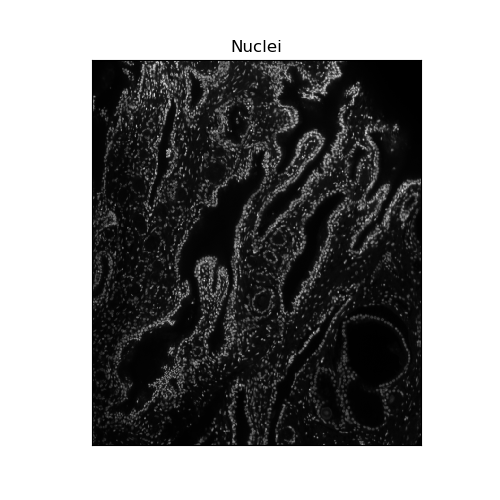

<IPython.core.display.Javascript object>


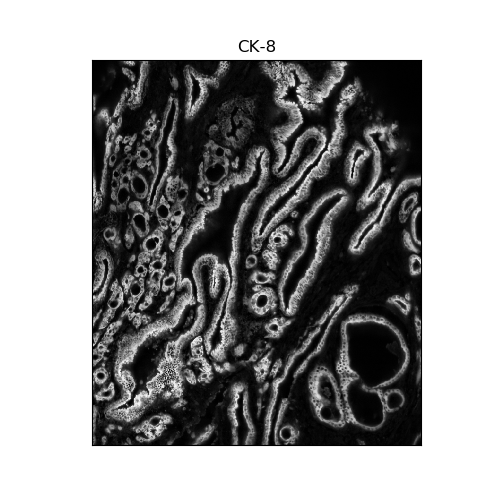

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b20838e6a0>)

In [9]:
#View example data

ViewImage(ihc_nuclei[0], title = 'Nuclei', figsize = (5,5), cmap = 'gray')
ViewImage(ihc_ck[0], title = 'CK-8', figsize = (5,5), cmap = 'gray')

In [10]:
#get color settings using fc.getColorSettings()
#to return pseudo-IHC color settings the key 'IHC' is used

IHC_settings = fc.getColorSettings(key = 'IHC')

#Color settings are in RGB order
print(IHC_settings)

{'nuclei': [0.65, 0.45, 0.15], 'anti': [0.4, 0.7, 0.9]}


In [11]:
#ihc_ck is taking the place of the 'cyto' argument in rapidFalseColor
#color settings are passed as arguments into rapidFalseColor as normal
pseudoIHC = fc.rapidFalseColor(ihc_nuclei[0], ihc_ck[0], IHC_settings['nuclei'], IHC_settings['anti'])

<IPython.core.display.Javascript object>


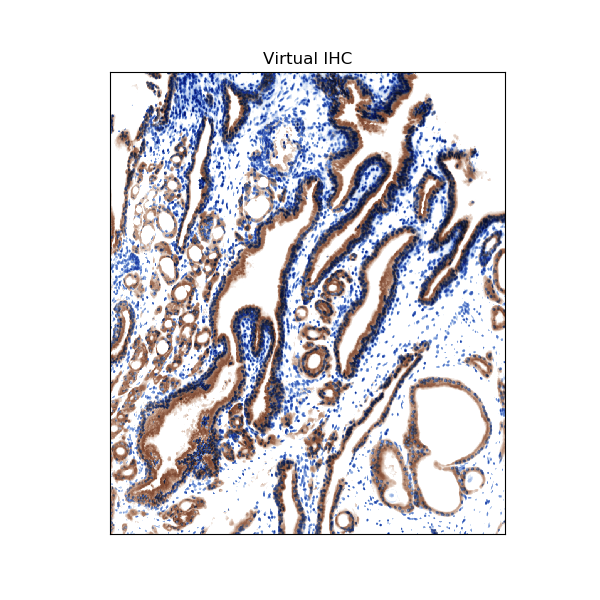

(<Figure size 600x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b208649d60>)

In [12]:
#View the pseudo IHC data
ViewImage(pseudoIHC, figsize = (6,6), title = 'Virtual IHC')